In [1]:
#numpy for array calculations
import numpy as np
#pandas for working with data
import pandas as pd
#matplotlib for graphs
import matplotlib.pyplot as plt


In [2]:
#read csv file and make it as dataframe
df = pd.read_csv("dataset.csv")
#print information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [3]:
#print first 5 data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#printing the total number of peoples without heart disease and with heart disease
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
#Our features = age - thal
features = df.iloc[:, 0:13]
label = df['target']

In [6]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


([<matplotlib.axis.YTick at 0xc7de070>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'sex'),
  Text(0, 2, 'cp'),
  Text(0, 3, 'trestbps'),
  Text(0, 4, 'chol'),
  Text(0, 5, 'fbs'),
  Text(0, 6, 'restecg'),
  Text(0, 7, 'thalach'),
  Text(0, 8, 'exang'),
  Text(0, 9, 'oldpeak'),
  Text(0, 10, 'slope'),
  Text(0, 11, 'ca'),
  Text(0, 12, 'thal'),
  Text(0, 13, 'target')])

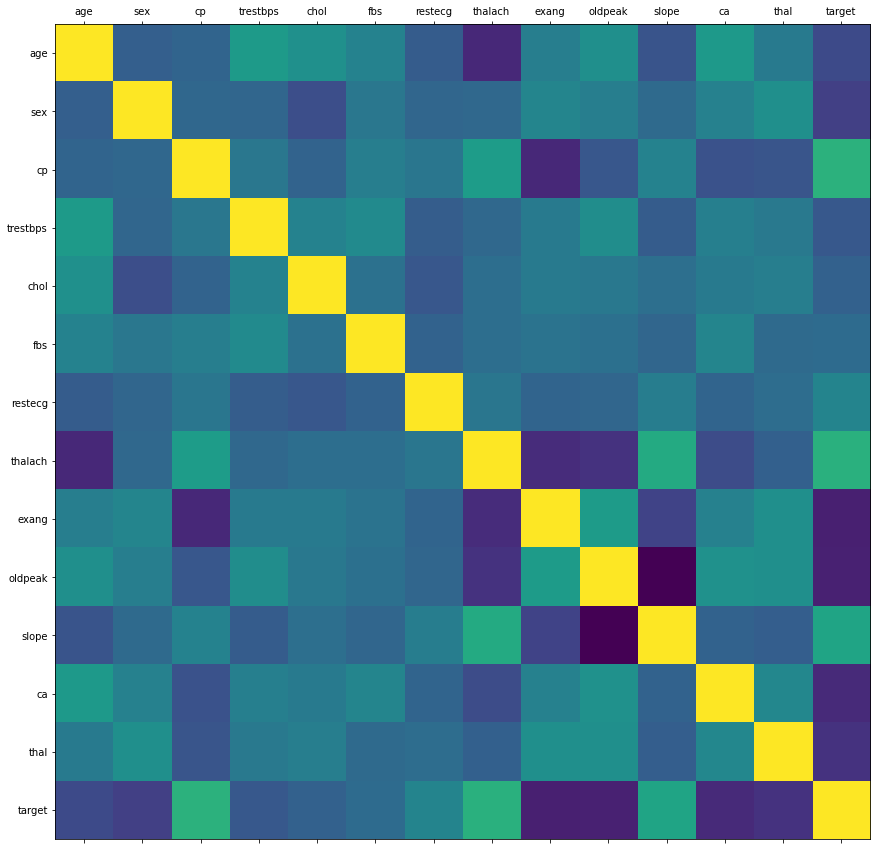

In [8]:
%matplotlib inline
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

In [9]:

from sklearn import ensemble
clf_rand = ensemble.RandomForestClassifier()

In [10]:
#we need to shuffle the data then we need split the dataset as training data and testing data
from sklearn.model_selection import train_test_split

In [11]:
#random state is a calculated randomness
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=40)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [12]:
#fitting the training dataset to the classifier 
clf_rand.fit(X_train, y_train)


RandomForestClassifier()

In [13]:
#predicting the test dataset through classifier
pred_rand = clf_rand.predict(X_test)

In [14]:
print(pred_rand)

[1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1]


In [15]:
#confusion matrix for random forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_rand)
print(cm)

[[33  7]
 [ 6 45]]


In [16]:
#how accurately our classifier predicts those test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_rand)

0.8571428571428571

In [17]:
#predicting with the new value
clf_rand.predict([[39, 0, 1, 135, 208, 0, 0, 171, 0, 1.5, 2, 0, 2]])

array([1], dtype=int64)

In [18]:
# Import pickle Package

import pickle

In [19]:
# Save the Modle to file in the current working directory

model = "model1.pkl"  

with open(model, 'wb') as file:  
    pickle.dump(clf_rand, file)

In [20]:
# Load the Model back from file
with open(model, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

RandomForestClassifier()

In [21]:
# Calculate the Score 
score = Pickled_LR_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  


Test score: 85.71 %
